<a href="https://colab.research.google.com/github/EleVasilaki/data_stories_for_emme/blob/main/Homework_Lesson10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Για να φτιάξουμε wordclouds από κείμενα άρθρων χρειαζόμαστε τις παρακάτω βιβλιοθήκες, τις οποίες εισάγουμε όλες μαζί στην αρχή.

Εάν έχουμε ελληνικά κείμενα:
- βγάζουμε το # από την αρχή της παρακάτω εντολής (κάνουμε δλδ uncomment) και τρέχουμε το κελί
- όταν τελειώσει:
1. ξαναβάζουμε το # (κάνουμε comment)
2. Runtime -> Restart session and run all (ανανεώνουμε το session για να ξέρει ότι τώρα έχουμε και το λεξικό της βιβλιοθήκης spacy)

In [77]:
#!python -m spacy download el_core_news_sm

### ΕΙΣΑΓΩΓΗ ΒΙΒΛΙΟΘΗΚΩΝ

In [78]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# εάν έχουμε αγγλικά κείμενα
from wordcloud import WordCloud, STOPWORDS

# εάν έχουμε ελληνικά κείμενα
import spacy

In [79]:
# φτιάχνω κατευθείαν και το nlp για να το έχω έτοιμο για τα wordclouds μου και όποια ανάλυση κειμένου θέλω να κάνω
nlp = spacy.load('el_core_news_sm')

OSError: [E050] Can't find model 'el_core_news_sm'. It doesn't seem to be a Python package or a valid path to a data directory.

### ΔΗΜΙΟΥΡΓΙΑ DATAFRAME

Αρχικά, φέρνουμε τα δεδομένα μας (αρχεία xlsx ή csv) και τα ανεβάζουμε στο drive μας.

Στη συνέχεια, εισάγουμε τα δεδομένα μας στην python (φτιάχνουμε dataframes).

Στην αριστερή μπάρα στο colab:
- πατάτε το εικονίδιο του φακέλου (τελευταίο εικονίδιο)
- πατάτε το εικονίδιο του φακέλου με το σήμα του google drive και συνδέεστε στο drive σας
- AN TO KANETE ΓΙΑ ΠΡΩΤΗ ΦΟΡΑ στον υπολογιστή σας, θα σας πει να τρέξετε ένα κελί που δημιουργεί για να συνδεθείτε στο drive σας - Μόλις το τρέξετε θα σας ανοίξει ένα παράθυρο για να αποδεχθείτε τη σύνδεση
- πατάτε το φάκελο του drive και του MyDrive
- ΑΝ ΔΕΝ ΥΠΑΡΧΕΙ ο φάκελος του Drive, κάνετε Refresh το tab στον browser και θα εμφανιστεί
- πατάτε στο φάκελο που έχετε ανεβάσει το xlsx της efsyn
- εντοπίζετε το xslx, βάζετε πάνω του το πονίκι και πατάτε στις 3 τελίτσες που εμφανίζονται δεξιά του ονόματος του αρχείου
- πατάτε copy path στο μενού που εμφανίζεται

Σε ένα νέο κελί γράφετε:

```
df = pd.read_excel(<κάνετε paste το path που κάνατε copy στο τελευταίο παραπάνω βήμα, μέσα σε εισαγωγικά>)
```

In [88]:


# δημιουργία dataframe από το αρχείο των δεδομένων μα
ERTdf = pd.read_csv("/content/drive/MyDrive/ertnews.gr-MAY23.csv")

In [89]:
# δημιουργία dataframe από το αρχείο των δεδομένων μας
ERTdf = pd.read_csv("/content/drive/MyDrive/ertnews.gr-MAY23.csv")
ERTdf


,site,url,date,section,title,author,text
0,ertnews.gr,https://www.ertnews.gr/eidiseis/o-santiago-pen...,2023-05-01,Αμερική,"Ο Σαντιάγο Πένια, νέος πρόεδρος της Παραγουάης",Συντακτική ομάδα ertnews.gr,"Ο Σαντιάγο Πένια, ο υποψήφιος του κυβερνώντος ..."
1,ertnews.gr,https://www.ertnews.gr/roi-idiseon/synantisi-t...,2023-05-01,ΔΙΕΘΝΗ,Συνάντηση του αρχηγού του ουκρανικού στρατού μ...,Συντακτική ομάδα ertnews.gr,Εν μέσω προετοιμασιών για την πολυσυζητημένη ο...
2,ertnews.gr,https://www.ertnews.gr/eidiseis/diethni/rosia-...,2023-05-01,ΔΙΕΘΝΗ,Ρωσία: Απεβίωσε σε ηλικία 85 ετών ο διάσημος σ...,Συντακτική Ομάδα ertnews.gr,Απεβίωσε σε ηλικία 85 ετών ο διάσημος Ρώσος σχ...
3,ertnews.gr,https://www.ertnews.gr/eidiseis/katastrafike-k...,2023-05-01,ΕΛΛΑΔΑ,Καταστράφηκε καφετέρια στην Αρτέμιδα απο πυρκαγιά,Συντακτική ομάδα ertnews.gr,Ολοσχερώς καταστράφηκε καφετέρια στην Αρτέμιδα...
4,ertnews.gr,https://www.ertnews.gr/eidiseis/diethni/tourki...,2023-05-01,ΔΙΕΘΝΗ,Τουρκία: Ο «φερόμενος ηγέτης» του Ισλαμικού Κρ...,Συντακτική Ομάδα ertnews.gr,Ο «φερόμενος ηγέτης» της τζιχαντιστικής οργάνω...
...,...,...,...,...,...,...,...
4875,ertnews.gr,https://www.ertnews.gr/eidiseis/epistimi/ereyn...,2023-05-31,ΕΠΙΣΤΗΜΗ,Έρευνα: Πώς επηρεάζει τον εγκέφαλο η καρδιακή ...,Εύη Τσιριγωτάκη,Η αποκατάσταση μετά από καρδιακή προσβολή επικ...
4876,ertnews.gr,https://www.ertnews.gr/eidiseis/diethni/dania-...,2023-05-31,ΔΙΕΘΝΗ,Δανία: Η πρωθυπουργός εκφώνησε ομιλία από το C...,Συντακτική ομάδα ertnews.gr,Η πρωθυπουργός της Δανίας Μέτε Φρεντέρικσεν εκ...
4877,ertnews.gr,https://www.ertnews.gr/roi-idiseon/synantisi-p...,2023-05-31,Πολιτική,Συνάντηση ΠτΔ Κ. Σακελλαροπούλου με τον Αρχιεπ...,Συντακτική Ομάδα ertnews.gr,Η Πρόεδρος της Δημοκρατίας Κατερίνα Σακελλαροπ...
4878,ertnews.gr,https://www.ertnews.gr/eidiseis/ellada/politik...,2023-05-31,Πολιτική,ΥΠΕΞ: Βαθιά θλίψη για την απώλεια του Θεόδωρου...,Συντακτική ομάδα ertnews.gr,Σε ανακοίνωση προέβη το Υπουργείο Εξωτερικών γ...


### MISSING VALUES

Επειδή τα δεδομένα μας είναι πιθανό να έχουν ελλείπουσες τιμές (missing values), δηλαδή μπορεί να μην υπάρχει μια ημερομηνία σε ένα άρθρο ή ένας τίτλος ή οτιδήποτε, για να μην μας χτυπάει ο κώδικας παρακάτω, πετάμε απ' την αρχή όσα rows έχουν κενές τιμές (nan), με την παρακάτω εντολή:
```
# διαγραφή των rows με τιμή nan σε οποιοδήποτε column
df.dropna(inplace=True)
# reset_index για να ξαναγίνει συνεχής η αρίθμηση του index του dataframe
df = df.reset_index(drop=True)
```
Εννοείται ότι στη θέση του df βάζουμε το όνομα που δώσαμε στο dataframe μας.

In [94]:
# διαγραφή των rows με τιμή nan σε οποιοδήποτε column

ERTdf.dropna(inplace=True)

In [95]:
df = df.reset_index(drop=True)

NameError: name 'df' is not defined

In [92]:
# reset_index για να ξαναγίνει συνεχής η αρίθμηση του index του dataframe
ERTdf = df.reset_index(drop=True)

NameError: name 'df' is not defined

In [91]:
ERTdf = df.reset_index(drop=True)
ERTdf

NameError: name 'df' is not defined

### ΕΠΙΣΚΟΠΗΣΗ ΤΩΝ ΔΕΔΟΜΕΝΩΝ

Εξετάζουμε το dataframe για να κατανοήσουμε τι περιέχουν τα δεδομένα μας, με εργαλεία που έχουμε μάθει όπως, τα head(), shape, describe(), columns, unique() κλπ.

In [97]:
ERTdf.head()

,site,url,date,section,title,author,text
0,ertnews.gr,https://www.ertnews.gr/eidiseis/o-santiago-pen...,2023-05-01,Αμερική,"Ο Σαντιάγο Πένια, νέος πρόεδρος της Παραγουάης",Συντακτική ομάδα ertnews.gr,"Ο Σαντιάγο Πένια, ο υποψήφιος του κυβερνώντος ..."
1,ertnews.gr,https://www.ertnews.gr/roi-idiseon/synantisi-t...,2023-05-01,ΔΙΕΘΝΗ,Συνάντηση του αρχηγού του ουκρανικού στρατού μ...,Συντακτική ομάδα ertnews.gr,Εν μέσω προετοιμασιών για την πολυσυζητημένη ο...
2,ertnews.gr,https://www.ertnews.gr/eidiseis/diethni/rosia-...,2023-05-01,ΔΙΕΘΝΗ,Ρωσία: Απεβίωσε σε ηλικία 85 ετών ο διάσημος σ...,Συντακτική Ομάδα ertnews.gr,Απεβίωσε σε ηλικία 85 ετών ο διάσημος Ρώσος σχ...
3,ertnews.gr,https://www.ertnews.gr/eidiseis/katastrafike-k...,2023-05-01,ΕΛΛΑΔΑ,Καταστράφηκε καφετέρια στην Αρτέμιδα απο πυρκαγιά,Συντακτική ομάδα ertnews.gr,Ολοσχερώς καταστράφηκε καφετέρια στην Αρτέμιδα...
4,ertnews.gr,https://www.ertnews.gr/eidiseis/diethni/tourki...,2023-05-01,ΔΙΕΘΝΗ,Τουρκία: Ο «φερόμενος ηγέτης» του Ισλαμικού Κρ...,Συντακτική Ομάδα ertnews.gr,Ο «φερόμενος ηγέτης» της τζιχαντιστικής οργάνω...


In [98]:
ERTdf.tail()

,site,url,date,section,title,author,text
4875,ertnews.gr,https://www.ertnews.gr/eidiseis/epistimi/ereyn...,2023-05-31,ΕΠΙΣΤΗΜΗ,Έρευνα: Πώς επηρεάζει τον εγκέφαλο η καρδιακή ...,Εύη Τσιριγωτάκη,Η αποκατάσταση μετά από καρδιακή προσβολή επικ...
4876,ertnews.gr,https://www.ertnews.gr/eidiseis/diethni/dania-...,2023-05-31,ΔΙΕΘΝΗ,Δανία: Η πρωθυπουργός εκφώνησε ομιλία από το C...,Συντακτική ομάδα ertnews.gr,Η πρωθυπουργός της Δανίας Μέτε Φρεντέρικσεν εκ...
4877,ertnews.gr,https://www.ertnews.gr/roi-idiseon/synantisi-p...,2023-05-31,Πολιτική,Συνάντηση ΠτΔ Κ. Σακελλαροπούλου με τον Αρχιεπ...,Συντακτική Ομάδα ertnews.gr,Η Πρόεδρος της Δημοκρατίας Κατερίνα Σακελλαροπ...
4878,ertnews.gr,https://www.ertnews.gr/eidiseis/ellada/politik...,2023-05-31,Πολιτική,ΥΠΕΞ: Βαθιά θλίψη για την απώλεια του Θεόδωρου...,Συντακτική ομάδα ertnews.gr,Σε ανακοίνωση προέβη το Υπουργείο Εξωτερικών γ...
4879,ertnews.gr,https://www.ertnews.gr/eidiseis/ellada/politik...,2023-05-31,Πολιτική,Άγρια κόντρα Πλεύρη – Ηλιόπουλου στο Twitter γ...,Συντακτική Ομάδα ertnews.gr,Κόντρα ξέσπασε μεταξύ του πρωην Υπουργού Υγεία...


In [100]:

ERTdf.shape

(4880, 7)

In [101]:
ERTdf.describe()

,site,url,date,section,title,author,text
count,4880,4880,4880,4880,4880,4880,4880
unique,1,4880,31,45,4868,59,4862
top,ertnews.gr,https://www.ertnews.gr/eidiseis/o-santiago-pen...,2023-05-10,ΔΙΕΘΝΗ,Eurovision 2023: Πανέτοιμος ο Β. Βερνίκος για ...,Συντακτική ομάδα ertnews.gr,Συνεχίζονται οι έρευνες για τον εντοπισμό75χρο...
freq,4880,1,216,1842,2,2857,2


In [102]:

ERTdf.columns

Index(['site', 'url', 'date', 'section', 'title', 'author', 'text'], dtype='object')

In [103]:

ERTdf.dtypes

site       object
url        object
date       object
section    object
title      object
author     object
text       object
dtype: object

### ΣΥΝΕΝΩΣΗ ΣΤΗΛΩΝ ΚΕΙΜΕΝΩΝ

Αν θέλουμε να ενώσουμε κείμενα από δυο ή περισσότερες στήλες και να τα σώσουμε σε μια νέα στήλη, (π.χ. τον τίτλο με το κείμενο του άρθρου), μπορούμε να το κάνουμε ή με απλή πρόσθεση των επιθυμητών στηλών και πρόσθεση κενού ανάμεσά τους:

```
df["full_text"] = df["title"] + " " + df["body_text"]
```
ή με το aggregate

```
df['full_text'] = df[['title', 'body_text']].agg(' '.join, axis=1)
```

In [104]:

ERTdf

,site,url,date,section,title,author,text
0,ertnews.gr,https://www.ertnews.gr/eidiseis/o-santiago-pen...,2023-05-01,Αμερική,"Ο Σαντιάγο Πένια, νέος πρόεδρος της Παραγουάης",Συντακτική ομάδα ertnews.gr,"Ο Σαντιάγο Πένια, ο υποψήφιος του κυβερνώντος ..."
1,ertnews.gr,https://www.ertnews.gr/roi-idiseon/synantisi-t...,2023-05-01,ΔΙΕΘΝΗ,Συνάντηση του αρχηγού του ουκρανικού στρατού μ...,Συντακτική ομάδα ertnews.gr,Εν μέσω προετοιμασιών για την πολυσυζητημένη ο...
2,ertnews.gr,https://www.ertnews.gr/eidiseis/diethni/rosia-...,2023-05-01,ΔΙΕΘΝΗ,Ρωσία: Απεβίωσε σε ηλικία 85 ετών ο διάσημος σ...,Συντακτική Ομάδα ertnews.gr,Απεβίωσε σε ηλικία 85 ετών ο διάσημος Ρώσος σχ...
3,ertnews.gr,https://www.ertnews.gr/eidiseis/katastrafike-k...,2023-05-01,ΕΛΛΑΔΑ,Καταστράφηκε καφετέρια στην Αρτέμιδα απο πυρκαγιά,Συντακτική ομάδα ertnews.gr,Ολοσχερώς καταστράφηκε καφετέρια στην Αρτέμιδα...
4,ertnews.gr,https://www.ertnews.gr/eidiseis/diethni/tourki...,2023-05-01,ΔΙΕΘΝΗ,Τουρκία: Ο «φερόμενος ηγέτης» του Ισλαμικού Κρ...,Συντακτική Ομάδα ertnews.gr,Ο «φερόμενος ηγέτης» της τζιχαντιστικής οργάνω...
...,...,...,...,...,...,...,...
4875,ertnews.gr,https://www.ertnews.gr/eidiseis/epistimi/ereyn...,2023-05-31,ΕΠΙΣΤΗΜΗ,Έρευνα: Πώς επηρεάζει τον εγκέφαλο η καρδιακή ...,Εύη Τσιριγωτάκη,Η αποκατάσταση μετά από καρδιακή προσβολή επικ...
4876,ertnews.gr,https://www.ertnews.gr/eidiseis/diethni/dania-...,2023-05-31,ΔΙΕΘΝΗ,Δανία: Η πρωθυπουργός εκφώνησε ομιλία από το C...,Συντακτική ομάδα ertnews.gr,Η πρωθυπουργός της Δανίας Μέτε Φρεντέρικσεν εκ...
4877,ertnews.gr,https://www.ertnews.gr/roi-idiseon/synantisi-p...,2023-05-31,Πολιτική,Συνάντηση ΠτΔ Κ. Σακελλαροπούλου με τον Αρχιεπ...,Συντακτική Ομάδα ertnews.gr,Η Πρόεδρος της Δημοκρατίας Κατερίνα Σακελλαροπ...
4878,ertnews.gr,https://www.ertnews.gr/eidiseis/ellada/politik...,2023-05-31,Πολιτική,ΥΠΕΞ: Βαθιά θλίψη για την απώλεια του Θεόδωρου...,Συντακτική ομάδα ertnews.gr,Σε ανακοίνωση προέβη το Υπουργείο Εξωτερικών γ...


In [105]:

ERTdf['text'] = ERTdf[['title', 'text']].agg('. '.join, axis=1)
ERTdf.loc[0, 'text']

'Ο Σαντιάγο Πένια, νέος πρόεδρος της Παραγουάης. Ο Σαντιάγο Πένια, ο υποψήφιος του κυβερνώντος κόμματος Colorado (δεξιά) –στην εξουσία επί σχεδόν οκτώ δεκαετίες στην Παραγουάη–, εξελέγη πρόεδρος της χώρας επικρατώντας του βασικού αντιπάλου του, του κεντροαριστερού Εφραίν Αλέγκρε, σύμφωνα με τα επίσημα αποτελέσματα. Ο κ. Πένια, οικονομολόγος 44 ετών, άλλοτε υπουργός Οικονομικών (2015-2017) της κυβέρνησης του προέδρου Οράσιο Καρτές (2013-2018), ανακηρύχθηκε νικητής από το εκλογοδικείο (την εθνική εφορευτική επιτροπή), καθώς συγκέντρωνε το 42% και πλέον των ψήφων, έναντι 27,5% του εξηντάρη κ. Αλέγκρε, με το 96% των ψηφοδελτίων να έχει καταμετρηθεί. Θα διαδεχθεί τον Αύγουστο τον Μάριο Άμπντο Μπενίτες. Η προεδρική θητεία είναι πενταετής. Πηγή: ΑΠΕ-ΜΠΕ, AFP '

### DATETIME

Για να μπορούμε να κάνουμε αναλύσεις βάσει του χρόνου, μετατρέπουμε τις ημερομηνίες από string σε datetime, με την εντολή:

```
df['datetime'] = pd.to_datetime(df['date'], format='%Y-%m-%d %H:%M')
```
Στο παραπάνω παράδειγμα, η νέα στήλη που φτιάχνουμε θα λέγεται 'datetime', η υπάρχουσα στήλη των ημερομηνιών στο df μας λέγεται 'date' και η μορφή των ημερομηνιών που περιέχει είναι: ΕΤΟΣ-ΜΗΝΑΣ-ΗΜΕΡΑ ΩΡΑ:ΛΕΠΤΑ (π.χ. 2024-06-05 13:41)

H μορφή των ημερομηνιών στη στήλη 'date', καθορίζει το format='', που θα βάλουμε μέσα στην παρέμθεση στην εντολή μας. Κάθε site ή εφαρμογή επιλέγει τον τρόπο παρουσίασης των ημερομηνιών που του αρέσει (π.χ. κάποιος βάζει τις ημερομηνίες στη μορφή: 5 Ιουνίου 2024)

Τους κωδικούς για το format θα τους βρείτε εδώ: https://docs.python.org/3/library/datetime.html#strftime-and-strptime-behavior

In [107]:
# Μετατροπή της στήλης των ημερομηνιών σε datetime
ERTdf['datetime'] = pd.to_datetime(ERTdf['date'], format='%Y-%m-%d')
ERTdf

,site,url,date,section,title,author,text,datetime
0,ertnews.gr,https://www.ertnews.gr/eidiseis/o-santiago-pen...,2023-05-01,Αμερική,"Ο Σαντιάγο Πένια, νέος πρόεδρος της Παραγουάης",Συντακτική ομάδα ertnews.gr,"Ο Σαντιάγο Πένια, νέος πρόεδρος της Παραγουάης...",2023-05-01
1,ertnews.gr,https://www.ertnews.gr/roi-idiseon/synantisi-t...,2023-05-01,ΔΙΕΘΝΗ,Συνάντηση του αρχηγού του ουκρανικού στρατού μ...,Συντακτική ομάδα ertnews.gr,Συνάντηση του αρχηγού του ουκρανικού στρατού μ...,2023-05-01
2,ertnews.gr,https://www.ertnews.gr/eidiseis/diethni/rosia-...,2023-05-01,ΔΙΕΘΝΗ,Ρωσία: Απεβίωσε σε ηλικία 85 ετών ο διάσημος σ...,Συντακτική Ομάδα ertnews.gr,Ρωσία: Απεβίωσε σε ηλικία 85 ετών ο διάσημος σ...,2023-05-01
3,ertnews.gr,https://www.ertnews.gr/eidiseis/katastrafike-k...,2023-05-01,ΕΛΛΑΔΑ,Καταστράφηκε καφετέρια στην Αρτέμιδα απο πυρκαγιά,Συντακτική ομάδα ertnews.gr,Καταστράφηκε καφετέρια στην Αρτέμιδα απο πυρκα...,2023-05-01
4,ertnews.gr,https://www.ertnews.gr/eidiseis/diethni/tourki...,2023-05-01,ΔΙΕΘΝΗ,Τουρκία: Ο «φερόμενος ηγέτης» του Ισλαμικού Κρ...,Συντακτική Ομάδα ertnews.gr,Τουρκία: Ο «φερόμενος ηγέτης» του Ισλαμικού Κρ...,2023-05-01
...,...,...,...,...,...,...,...,...
4875,ertnews.gr,https://www.ertnews.gr/eidiseis/epistimi/ereyn...,2023-05-31,ΕΠΙΣΤΗΜΗ,Έρευνα: Πώς επηρεάζει τον εγκέφαλο η καρδιακή ...,Εύη Τσιριγωτάκη,Έρευνα: Πώς επηρεάζει τον εγκέφαλο η καρδιακή ...,2023-05-31
4876,ertnews.gr,https://www.ertnews.gr/eidiseis/diethni/dania-...,2023-05-31,ΔΙΕΘΝΗ,Δανία: Η πρωθυπουργός εκφώνησε ομιλία από το C...,Συντακτική ομάδα ertnews.gr,Δανία: Η πρωθυπουργός εκφώνησε ομιλία από το C...,2023-05-31
4877,ertnews.gr,https://www.ertnews.gr/roi-idiseon/synantisi-p...,2023-05-31,Πολιτική,Συνάντηση ΠτΔ Κ. Σακελλαροπούλου με τον Αρχιεπ...,Συντακτική Ομάδα ertnews.gr,Συνάντηση ΠτΔ Κ. Σακελλαροπούλου με τον Αρχιεπ...,2023-05-31
4878,ertnews.gr,https://www.ertnews.gr/eidiseis/ellada/politik...,2023-05-31,Πολιτική,ΥΠΕΞ: Βαθιά θλίψη για την απώλεια του Θεόδωρου...,Συντακτική ομάδα ertnews.gr,ΥΠΕΞ: Βαθιά θλίψη για την απώλεια του Θεόδωρου...,2023-05-31


Αφού μετατρέψουμε τις ημερομηνίες σε datetime, τώρα μπορούμε να φτιάξουμε στήλες με τα έτη, τους μήνες, τις μέρες κλπ.

```
df['year'] = pd.DatetimeIndex(df['datetime']).year
df['month'] = pd.DatetimeIndex(df['datetime']).month
df['day'] = pd.DatetimeIndex(df['datetime']).day
df['hour'] = pd.DatetimeIndex(df['datetime']).hour
```

In [109]:
ERTdf['year'] = pd.DatetimeIndex(ERTdf['datetime']).year

# στήλη μήνα
ERTdf['month'] = pd.DatetimeIndex(ERTdf['datetime']).month
# κλπ.
ERTdf['day'] = pd.DatetimeIndex(ERTdf['datetime']).day
ERTdf['hour'] = pd.DatetimeIndex(ERTdf['datetime']).hour
ERTdf

,site,url,date,section,title,author,text,datetime,year,month,day,hour
0,ertnews.gr,https://www.ertnews.gr/eidiseis/o-santiago-pen...,2023-05-01,Αμερική,"Ο Σαντιάγο Πένια, νέος πρόεδρος της Παραγουάης",Συντακτική ομάδα ertnews.gr,"Ο Σαντιάγο Πένια, νέος πρόεδρος της Παραγουάης...",2023-05-01,2023,5,1,0
1,ertnews.gr,https://www.ertnews.gr/roi-idiseon/synantisi-t...,2023-05-01,ΔΙΕΘΝΗ,Συνάντηση του αρχηγού του ουκρανικού στρατού μ...,Συντακτική ομάδα ertnews.gr,Συνάντηση του αρχηγού του ουκρανικού στρατού μ...,2023-05-01,2023,5,1,0
2,ertnews.gr,https://www.ertnews.gr/eidiseis/diethni/rosia-...,2023-05-01,ΔΙΕΘΝΗ,Ρωσία: Απεβίωσε σε ηλικία 85 ετών ο διάσημος σ...,Συντακτική Ομάδα ertnews.gr,Ρωσία: Απεβίωσε σε ηλικία 85 ετών ο διάσημος σ...,2023-05-01,2023,5,1,0
3,ertnews.gr,https://www.ertnews.gr/eidiseis/katastrafike-k...,2023-05-01,ΕΛΛΑΔΑ,Καταστράφηκε καφετέρια στην Αρτέμιδα απο πυρκαγιά,Συντακτική ομάδα ertnews.gr,Καταστράφηκε καφετέρια στην Αρτέμιδα απο πυρκα...,2023-05-01,2023,5,1,0
4,ertnews.gr,https://www.ertnews.gr/eidiseis/diethni/tourki...,2023-05-01,ΔΙΕΘΝΗ,Τουρκία: Ο «φερόμενος ηγέτης» του Ισλαμικού Κρ...,Συντακτική Ομάδα ertnews.gr,Τουρκία: Ο «φερόμενος ηγέτης» του Ισλαμικού Κρ...,2023-05-01,2023,5,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
4875,ertnews.gr,https://www.ertnews.gr/eidiseis/epistimi/ereyn...,2023-05-31,ΕΠΙΣΤΗΜΗ,Έρευνα: Πώς επηρεάζει τον εγκέφαλο η καρδιακή ...,Εύη Τσιριγωτάκη,Έρευνα: Πώς επηρεάζει τον εγκέφαλο η καρδιακή ...,2023-05-31,2023,5,31,0
4876,ertnews.gr,https://www.ertnews.gr/eidiseis/diethni/dania-...,2023-05-31,ΔΙΕΘΝΗ,Δανία: Η πρωθυπουργός εκφώνησε ομιλία από το C...,Συντακτική ομάδα ertnews.gr,Δανία: Η πρωθυπουργός εκφώνησε ομιλία από το C...,2023-05-31,2023,5,31,0
4877,ertnews.gr,https://www.ertnews.gr/roi-idiseon/synantisi-p...,2023-05-31,Πολιτική,Συνάντηση ΠτΔ Κ. Σακελλαροπούλου με τον Αρχιεπ...,Συντακτική Ομάδα ertnews.gr,Συνάντηση ΠτΔ Κ. Σακελλαροπούλου με τον Αρχιεπ...,2023-05-31,2023,5,31,0
4878,ertnews.gr,https://www.ertnews.gr/eidiseis/ellada/politik...,2023-05-31,Πολιτική,ΥΠΕΞ: Βαθιά θλίψη για την απώλεια του Θεόδωρου...,Συντακτική ομάδα ertnews.gr,ΥΠΕΞ: Βαθιά θλίψη για την απώλεια του Θεόδωρου...,2023-05-31,2023,5,31,0


In [ ]:
# στήλη έτους

# στήλη μήνα

# κλπ.

### ΓΡΑΦΗΜΑΤΑ ΠΕΡΙΓΡΑΦΙΚΗΣ ΑΝΑΛΥΣΗΣ ΤΩΝ ΔΕΔΟΜΕΝΩΝ

Με τις τεχνικές φιλτραρίσματος, σορταρίσματος και γκρουπαρίσματος που έχουμε μάθει, μπορούμε να φτιάξουμε γραφήματα που να απαντούν ερωτήματα όπως:

- ποιο είναι το πλήθος της αρθρογραφίας ανά ώρα;
- ποιο είναι το πλήθος της αρθρογραφίας ανά θεματική κατηγορία; ανά συντάκτη;
- πώς μεταβάλεται το πλήθος της αρθρογραφίας από μέρα σε μέρα; συνολικά και ανά κατηγορία;
- ποιοι είναι οι πολυγραφέστεροι συντάκτες;

<Axes: xlabel='section'>

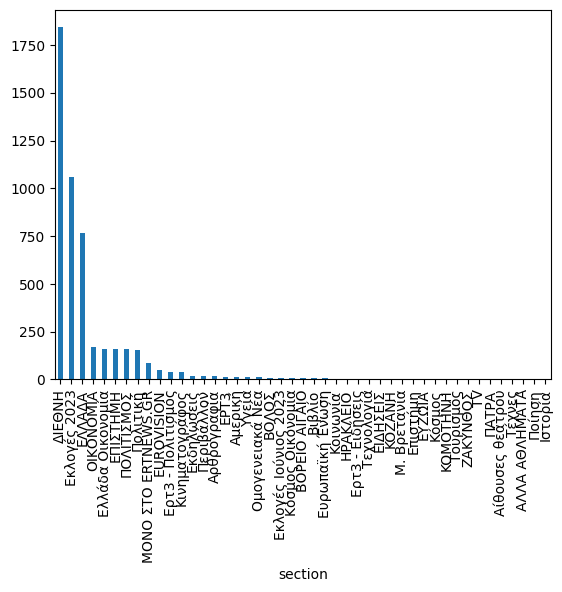

In [110]:
ERTdf['section'].value_counts().plot(kind='bar')

In [111]:

ERTdf['author'].value_counts().head(10)

author
Συντακτική ομάδα ertnews.gr    2857
Συντακτική Ομάδα ertnews.gr    1027
Κυριάκος Καρυώτης               166
Νάσος Μπράτσος                  126
Εύη Τσιριγωτάκη                 108
Δάφνη Σκαλιώνη                   85
Ντάνιελ Στάνκοβιτς               74
Ιωάννης Δασκαλάκης               60
Δανάη Γραφάκου                   49
Μαρία Νικολαΐδου                 48
Name: count, dtype: int64

<Axes: xlabel='author'>

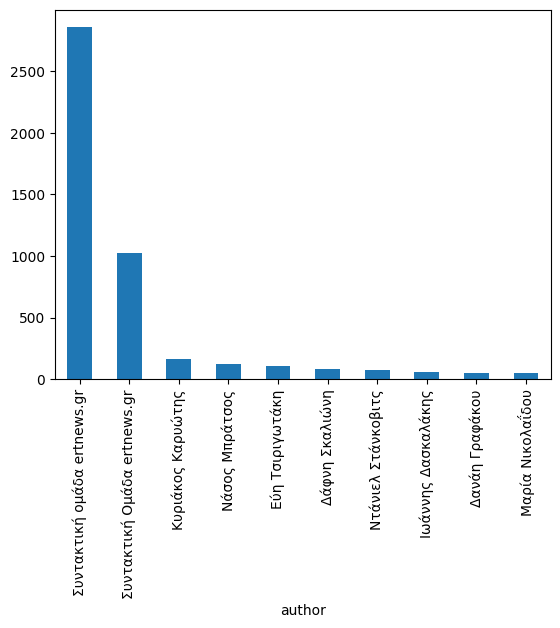

In [112]:

ERTdf['author'].value_counts().head(10).plot(kind='bar')

## Wordclouds

Τα wordclouds είναι ένα γράφημα που μας επιτρέπει να σχηματίσουμε μια γρήγορη άποψη για τη θεματολογία ενός κειμένου ή ενός σώματος κειμένων.

Μπορούμε να φτιάξουμε wordclouds για το σύνολο των κειμένων μας, αλλά μπορεί να είναι χρησιμότερο να το χρησιμοποιήσουμε σε στοχευμένα κείμενα.

Π.χ.: ας υποθέσουμε ότι από τα προηγούμενα γραφήματα είδαμε ότι το πλήθος της αρθρογραφίας μια συγκεκριμένη μέρα (ή σε ένα γκρουπ ημερών) είναι πολύ μεγαλύτερο από το μέσο όρο του πλήθους των άρθρων ανά ημέρα. Και πιο συγκεκριμένα, είναι μεγαλύτερο στην κατηγορία αθλητικά.

Αν φτιάξουμε ένα wordcloud μόνο για τα άρθρα της συγκεκριμένης κατηγορίας, της συγκεκριμένης ημέρας, θα βρούμε γρήγορα τις λέξεις που αφορούν το σημαντικό αθλητικό γεγονός εκείνης της ημέρας.

#### ΠΑΡΑΔΕΙΓΜΑ WORDCLOUD ME KEIMENO ΚΑΤΕΥΘΕΙΑΝ AΠΟ TH ΣΤΗΛΗ ΚΕΙΜΕΝΟΥ ΤΟΥ DATAFRAME

**!!!ΠΡΟΣΟΧΗ!!!** Eπειδή το dataframe φτιάχνεται από αρχείο που είναι στο drive μου, μην κάνετε uncomment και τρέξετε τα παρακάτω κελιά γιατί θα εξαφανιστούν τα outputs.

In [ ]:
# df = pd.read_excel("/content/drive/MyDrive/2023/teaching python/Lesson 9/efsyn_full_articles_ekloges_2023_7_5_2023.xlsx")
# df.tail()

In [80]:
# df.dropna(inplace=True)
# df = df.reset_index(drop=True)

In [81]:
# df['text'] = df[['title', 'full_text']].agg(' '.join, axis=1)

In [82]:
# df[['date', "section"]].describe()

In [83]:
# df['datetime'] = pd.to_datetime(df['date'], format='%Y-%m-%d %H:%M')
# df['day'] = pd.DatetimeIndex(df['datetime']).day

In [84]:
# df[df["section"]=="ΠΟΛΙΤΙΚΗ"].groupby("day", as_index=False)['title'].count().sort_values("title", ascending=False)

Βλέπω ότι τα περισσότερα άρθρα στην κατηγορία ΠΟΛΙΤΙΚΗ ήταν στις 6 Ιουνίου (τα δεδομένα μου είναι από 30/5 - 6/6 του 2023). Φιλτράρω το dataframe μου.

In [85]:
# df[(df["section"]=="ΠΟΛΙΤΙΚΗ") & (df["day"]==6)]["text"]

Ακριβώς αυτό το φίλτρο μπορώ να το βάλω στην παράμετρο του generate() στο wordcloud

In [86]:
# wordcloud = WordCloud(
#     stopwords = nlp.Defaults.stop_words,
#     width = 2000,
#     height = 1000,
#     background_color = 'black'
#  ).generate(' '.join(df[(df["section"]=="ΠΟΛΙΤΙΚΗ") & (df["day"]==6)]["text"]))
# fig = plt.figure(
#     figsize = (10, 8),
#     facecolor = 'k',
#     edgecolor = 'k')
# plt.imshow(wordcloud, interpolation = 'bilinear')
# plt.axis('off')
# plt.tight_layout(pad=0)
# plt.show()

Κι αν θέλω να κάνω και lemmatization για να φύγουν οι διαφορετικές πτώσεις των ίδιων λέξεων:

In [87]:
# wordcloud = WordCloud(
#     stopwords = nlp.Defaults.stop_words,
#     width = 2000,
#     height = 1000,
#     background_color = 'black'
#  ).generate(' '.join(token.lemma_ for token in nlp(' '.join(df[(df["section"]=="ΠΟΛΙΤΙΚΗ") & (df["day"]==6)]["text"]))))
# fig = plt.figure(
#     figsize = (10, 8),
#     facecolor = 'k',
#     edgecolor = 'k')
# plt.imshow(wordcloud, interpolation = 'bilinear')
# plt.axis('off')
# plt.tight_layout(pad=0)
# plt.show()

Για όποιον θα ήθελε να παίξει με την εμφάνιση του wordcloud: https://amueller.github.io/word_cloud/auto_examples/index.html

## ΣΥΜΠΕΡΑΣΜΑΤΑ

Τα δεδομένα δείχνουν ότι η πλειονότητα των ειδήσεων αφορά τις κατηγορίες «Πολιτική» και «Οικονομία». Αυτό υποδηλώνει ότι οι αναγνώστες της ertnews.gr δίνουν ιδιαίτερη έμφαση σε θέματα που αφορούν τη διακυβέρνηση και την οικονομική κατάσταση της χώρας.